In [1]:
import pandas as pd
df=pd.read_csv(r"C:\Users\hanal\Downloads\diabetes (1).csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
from sklearn.model_selection import train_test_split as tt
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
import seaborn as sns
from sklearn.metrics import accuracy_score as ac 
from sklearn.metrics import precision_score as ps
from sklearn.metrics import recall_score as re
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

In [3]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]


In [5]:
x_train,x_test,y_train,y_test=tt(x,y,test_size=0.2,random_state=42)


ACCURACY: 0.7337662337662337
PRECISION: 0.625
RECALL: 0.6363636363636364


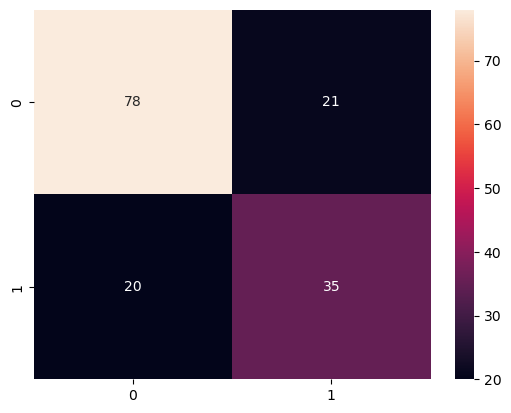

In [6]:
from sklearn.ensemble import RandomForestClassifier as rf
rfc=rf()
rfc.fit(x_train,y_train)
yp=rfc.predict(x_test)

cm=confusion_matrix(y_test,yp)
sns.heatmap(cm,fmt='g',annot=True)
print('ACCURACY:',ac(y_test,yp))
print('PRECISION:',ps(y_test,yp))
print('RECALL:',re(y_test,yp))

In [7]:
tn, fp, fn, tp = cm.ravel()
print(f"True Positives (TP): {tp}")
print(f"True Negatives (TN): {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")

True Positives (TP): 35
True Negatives (TN): 78
False Positives (FP): 21
False Negatives (FN): 20


In [9]:
import pandas as pd
dff=pd.read_csv(r"C:\Users\hanal\Downloads\dataset.csv")
dff.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [20]:
xx=dff.iloc[:,:-1]
yy=dff.iloc[:,-1]



In [11]:
xx_train,xx_test,yy_train,yy_test=tt(xx,yy,test_size=0.2,random_state=42)

ACCURACY: 0.8524590163934426
PRECISION: 0.8484848484848485
RECALL: 0.875


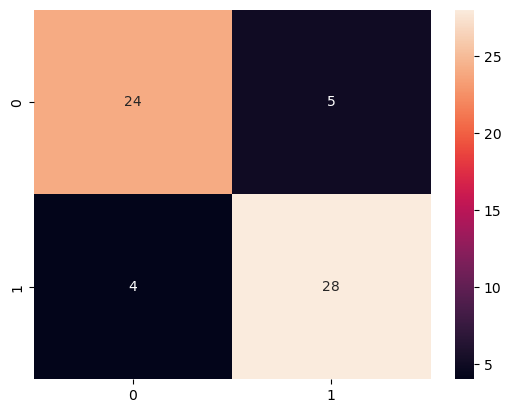

In [12]:
rfc1=rf()
rfc1.fit(xx_train,yy_train)
yp1=rfc1.predict(xx_test)

cm1=confusion_matrix(yy_test,yp1)
sns.heatmap(cm1,fmt='g',annot=True)
print('ACCURACY:',ac(yy_test,yp1))
print('PRECISION:',ps(yy_test,yp1))
print('RECALL:',re(yy_test,yp1))

In [13]:
tn, fp, fn, tp = cm1.ravel()
print(f"True Positives (TP): {tp}")
print(f"True Negatives (TN): {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")

True Positives (TP): 28
True Negatives (TN): 24
False Positives (FP): 5
False Negatives (FN): 4


In [21]:
from sklearn.metrics import roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import roc_curve, roc_auc_score
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

x_train,x_test,y_train,y_test=tt(x,y,test_size=0.2,random_state=42)
classifiers = [LogisticRegression(random_state=42), KNeighborsClassifier(),RandomForestClassifier(random_state=42)]
r= pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])
rl=[]
for i in classifiers:
    model = i.fit(x_train, y_train)
    yp = model.predict_proba(x_test)[::,1]
    fpr, tpr, thr = roc_curve(y_test,  yp)
    rl.append({'classifiers':i.__class__.__name__,'fpr':fpr.tolist(), 'tpr':tpr.tolist()})
result=pd.DataFrame(rl)
result.set_index('classifiers', inplace=True)


C:\Users\hanal\anaconda3\envs\FDS\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [16]:
import numpy as np

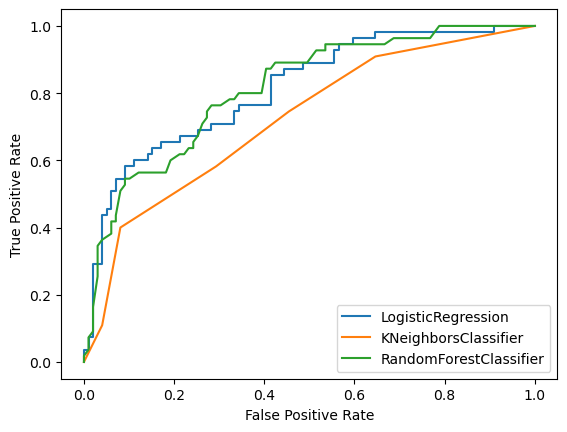

In [22]:

for i in result.index:
    plt.plot(result.loc[i]['fpr'], 
             result.loc[i]['tpr'],label=i
            )

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc='lower right')
plt.show()

In [ ]:
xx=dff.iloc[:,:-1]
yy=dff.iloc[:,-1]
xx_train,xx_test,yy_train,yy_test=tt(xx,yy,test_size=0.2,random_state=42)

In [23]:
rl=[]
for i in classifiers:
    model = i.fit(xx_train, yy_train)
    yp = model.predict_proba(xx_test)[::,1]
    fpr, tpr, thr = roc_curve(yy_test,  yp)
    rl.append({'classifiers':i.__class__.__name__,'fpr':fpr.tolist(), 'tpr':tpr.tolist()})
result=pd.DataFrame(rl)
result.set_index('classifiers', inplace=True)


C:\Users\hanal\anaconda3\envs\FDS\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


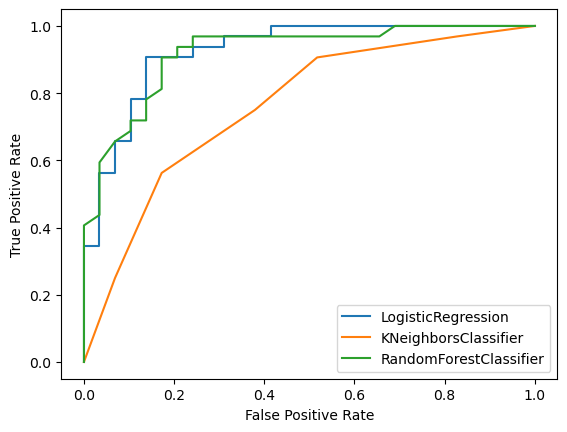

In [24]:

for i in result.index:
    plt.plot(result.loc[i]['fpr'], 
             result.loc[i]['tpr'],label=i
            )

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc='lower right')
plt.show()